<a href="https://colab.research.google.com/github/Richish/hands_on_ml/blob/master/10_intro_to_anns_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Why is this wave of interest in anns different than the last one-
1. There is now a huge quantity of data available to train neural networks, and
ANNs frequently outperform other ML techniques on very large and complex
problems.
2. Increase in compute today.
3. Some theoretical limitations of ANNs have turned out to be benign in practice.
For example, many people thought that ANN training algorithms were doomed
because they were likely to get stuck in local optima, but it turns out that this is
rather rare in practice (or when it is the case, they are usually fairly close to the
global optimum).

Biological brains of mammals- vast network of billions of neurons. each neuron Typically connected to thousands of other neurons. Highly complex computations can be performed by a vast network of fairly simple neurons.

Artificial neuron- It has one or more binary (on/off) inputs and one binary output. The artificial neuron simply activates its output when more than a certain number of its inputs are active. McCulloch and Pitts showed that even with such a simplified model(with just- identity, and, or, xor operations) it is possible to build a network of
artificial neurons that computes any logical proposition you want.

# The Perceptron
It is one of the simplest ANN architectures, invented in 1957 by Frank
Rosenblatt. It is based on a slightly different artificial neuron called
From Biological to Artificial Neurons a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU): the inputs and output are now numbers (instead of binary on/off values) and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs
(z = w1 x1 + w2 x2 + ⋯ + wn xn = xT w), then applies a step function to that sum and outputs the result: hw(x) = step(z), where z = xT w.



The most common step function used in Perceptrons is the Heaviside step function
heaviside(z) = 0 if z<0 else 1

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class.

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected
to all the inputs. When all the neurons in a layer are connected to every neuron in the
previous layer (i.e., its input neurons), it is called a fully connected layer or a dense
layer. To represent the fact that each input is sent to every TLU, it is common to draw
special passthrough neurons called input neurons: they just output whatever input
they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron
called a bias neuron, which just outputs 1 all the time. 

A Perceptron with two inputs and three outputs can classify instances simultaneously into three different binary classes, which makes it a multioutput
classifier.

hW, b( X) = ϕ(XW + b)


How are perceptrons trained- More specifically, the Perceptron is fed one
training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

wi, j next step = wi, j + η (y{j} − ÿ{j}).x{i}

The decision boundary of each output neuron is linear, so Perceptrons are incapable
of learning complex patterns (just like Logistic Regression classifiers). However, if the
training instances are linearly separable, Rosenblatt demonstrated that this algorithm
would converge to a solution.7 This is called the Perceptron convergence theorem.



## Perceptron with sklearn

In [43]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
y_pred = per_clf.predict([[2, 0.5]])

y_pred

array([0])

### sklearn's Perceptron vs SGDClassifier
Scikit-Learn’s Perceptron class is equivalent
to using an SGDClassifier with the following hyperparameters: loss="perceptron",
learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

However, contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

## Limitations of perceptrons:
a number of serious weaknesses of Perceptrons, in particular the fact that
they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem.



# Multi-Layer perceptrons (MLP)
some of the limitations of Perceptrons can be eliminated by
stacking multiple Perceptrons. The resulting ANN is called a Multi-Layer Perceptron (MLP). In particular, an MLP can solve the XOR problem.

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs,
called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers,
and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

When an ANN contains a deep stack of hidden layers8, it is called a deep neural network(DNN).

## Multi-Layer Perceptron and Backpropagation:
Backpropagation: it is simply Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regards to every single model parameter. In other words, it can find out how each connection weight and
each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

Autodiff- Automatically computing gradients is called automatic differentiation,
or autodiff. There are various autodiff techniques, with different
pros and cons. The one used by backpropagation is called
reverse-mode autodiff. It is fast and precise, and is well suited when
the function to differentiate has many variables (e.g., connection
weights) and few outputs (e.g., one loss).

## Backpropagation in detail:
1. It handles one mini-batch at a time (for example containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
2. Each mini-batch is passed to the network’s input layer, which just sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
3. Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
4. Then it computes how much each output connection contributed to the error.
This is done analytically by simply **applying the chain rule** (perhaps the most fundamental rule in calculus), which makes this step fast and precise.
5. The algorithm then measures how much of these error contributions came from
each connection in the layer below, again using the chain rule—and so on until
the algorithm reaches the input layer. As we explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
6. Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

**It is important to initialize all the hidden layers’ connection weights
randomly, or else training will fail.** For example, if you initialize all
weights and biases to zero, then all neurons in a given layer will be
perfectly identical, and thus backpropagation will affect them in
exactly the same way, so they will remain identical. In other words,
despite having hundreds of neurons per layer, your model will act
as if it had only one neuron per layer: it won’t be too smart. If
instead you randomly initialize the weights, you break the symmetry
and allow backpropagation to train a diverse team of neurons.

## Step function in MLP:

In order for this algorithm to work properly, the authors made a key change to the MLP’s architecture: they replaced the step function with the logistic function, σ(z) = 1 / (1 + exp(–z)). This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the logistic function. Two other popular activation functions are:

### The hyperbolic tangent function tanh(z) = 2σ(2z) – 1
Just like the logistic function it is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic function), which tends to make each layer’s output more or less centered around 0 at the beginning of training. This often helps speed up convergence.

### The Rectified Linear Unit function: ReLU(z) = max(0, z)
It is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for z < 0. However, in practice it works very well and has the advantage of being fast to compute11. Most importantly, the fact that it does not have a maximum output value also helps reduce some issues during Gradient Descent.

### Why do we need step function:
If you chain several linear transformations, all you get is a linear transformation. For example, say f(x) = 2 x + 3 and g(x) = 5 x - 1, then chaining these two linear functions gives you another linear function: f(g(x)) = 2(5 x - 1) + 3 = 10 x + 1. So if you don’t have some non-linearity between layers, then even a deep stack of layers is equivalent to a single layer: you cannot solve very complex problems with that.

## Regresssion MLPs
If you want to predict a single value (e.g.,
the price of a house given many of its features), then you just need a single output
neuron: its output is the predicted value. For multivariate regression (i.e., to predict
multiple values at once), you need one output neuron per output dimension.

## Choice of activation function:
In general, when building an MLP for regression, you do not want to use any activation
function for the output neurons, so they are free to output any range of values.
However, if you want to guarantee that the output will always be positive, then you
can use the ReLU activation function, or the softplus activation function in the output
layer. Finally, if you want to guarantee that the predictions will fall within a given
range of values, then you can use the logistic function or the hyperbolic tangent, and
scale the labels to the appropriate range: 0 to 1 for the logistic function, or –1 to 1 for
the hyperbolic tangent.

### Choice of loss function:
The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

The Huber loss is quadratic when the error is smaller than a threshold
δ (typically 1), but linear when the error is larger than δ. This
makes it less sensitive to outliers than the mean squared error, and
it is often more precise and converges faster than the mean absolute
error.

## Typical Regression MLP Architecture
1. input neurons - One per input feature (e.g., 28 x 28 = 784 for MNIST)
2. hidden layers - Depends on the problem. Typically 1 to 5.
3. neurons per hidden layer - Depends on the problem. Typically 10 to 100.
4. output neurons - 1 per prediction dimension
5. Hidden activation - ReLU (or SELU, see Chapter 11)
6. Output activation - None or ReLU/Softplus (if positive outputs) or Logistic Tanh (if bounded outputs)
7. Loss function - MSE or MAE/Huber (if outliers).



## Classification MLPs

### Binary classification:
Needs a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class.

### Multi-label classification:
For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or non-urgent email. In this case, you would need two output neurons, both using the logistic activation function. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to one. This lets the model output any combination of labels: you can have non-urgent ham, urgent ham, non-urgent spam, and perhaps even urgent spam (although that would probably be an error).

### Multi-class classsification:
If each instance can belong only to a single class, out of 3 or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add
up to one (which is required if the classes are exclusive). This is called multiclass classification.

### Loss function for classification:
Since we are predicting probability distributions, the cross-entropy (also called the log loss) is generally a good choice.


# Implementing MLPs with keras

## Keras:
To perform the heavy computations required by neural networks, keras-team relies on a computation backend. At the present, you can choose from three popular open source deep learning libraries: TensorFlow, Microsoft Cognitive Toolkit (CNTK) or Theano.

TensorFlow itself now comes bundled with its own Keras implementation called tf.keras. It only supports TensorFlow as the backend, but it has
the advantage of offering some very useful extra features: for
example, it supports TensorFlow’s Data API which makes it quite easy to load and preprocess data efficiently.

In [45]:
import tensorflow as tf
from tensorflow import keras
tf.__version__, keras.__version__

('2.3.0', '2.4.0')

## Building an image classifier using sequential api of keras:

Using Fashion MNIST data.
It has the exact same format as
MNIST (70,000 grayscale images of 28×28 pixels each, with 10 classes), but the
images represent fashion items rather than handwritten digits, so each class is more
diverse and the problem turns out to be significantly more challenging than MNIST.
For example, a simple linear model reaches about 92% accuracy on MNIST, but only
about 83% on Fashion MNIST.



In [46]:
# Loading data using keras

fashion_mnist = keras.datasets.fashion_mnist
help(fashion_mnist)
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape, X_train_full.dtype

Help on package tensorflow.keras.datasets.fashion_mnist in tensorflow.keras.datasets:

NAME
    tensorflow.keras.datasets.fashion_mnist - Fashion-MNIST dataset.

PACKAGE CONTENTS


FILE
    /usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py




((60000, 28, 28), dtype('uint8'))

### Loading MNIST or Fashion MNIST using Keras vs Scikit-Learn, one
Important difference is that every image is represented as a 28×28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from0 to 255) rather than floats (from 0.0 to 255.0).

Note that the dataset is already split into a training set and a test set, but there is no validation set, so let’s create one. Moreover, since we are going to **train the neural network using Gradient Descent, we must scale the input features***. For simplicity, we just
scale the pixel intensities down to the 0-1 range by dividing them by 255.0 (this also
converts them to floats):

In [47]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# we have to define what cleass each number in y represent
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

### Creating the Model Using the Sequential API

In [66]:
# Creating the Model Using the Sequential API
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=[28,28])) # alternativel can use - model.add(keras.layers.InputLayer(shape=[28,28]))
model.add(Dense(units=300, activation="relu"))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=10, activation="softmax")) # output layer 10 units-> 10 classes. softmax activation since it is multiclass classification

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


None as first dimension in output shape of layers mean that batch size can be anything.

More number of parameters in model gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

In [67]:
# layers of a model can be listed as :

print(model.layers)
print(model.layers[0].name, model.layers[1].name, model.layers[2].name,model.layers[3].name)
#print(model.get_layer('dense_2').name)

[<tensorflow.python.keras.layers.core.Flatten object at 0x7fe969a9fda0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe969aa36d8>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe968053d30>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe968062400>]
flatten_3 dense_9 dense_10 dense_11


All the parameters of a layer can be accessed using its get_weights() and
set_weights() method. For a Dense layer, this includes both the connection weights
and the bias terms:

In [69]:
hidden1=model.get_layer('dense_9')
weights, biases = hidden1.get_weights()
weights.shape, biases.shape, weights, biases

((784, 300),
 (300,),
 array([[-1.5212674e-02,  6.6495880e-02, -5.4218397e-03, ...,
          5.7591066e-02,  5.8487982e-02,  3.6486447e-02],
        [-1.6607173e-02,  2.6657544e-02,  7.3698714e-02, ...,
         -4.1087892e-02, -7.3400393e-02, -3.1902578e-02],
        [-6.8335399e-02, -8.0563128e-05,  6.4519867e-02, ...,
          1.1998147e-02, -4.2076692e-02,  3.9360724e-02],
        ...,
        [ 5.4183185e-02, -9.6232668e-03,  2.2241034e-02, ...,
          3.0676998e-02,  3.4056358e-02, -7.0022076e-02],
        [-3.1640995e-02,  2.5689021e-02,  1.3987489e-02, ...,
         -2.1036703e-02, -6.3982889e-02, -4.7445640e-02],
        [ 5.4960579e-02, -1.8498063e-02, -7.0042908e-04, ...,
         -1.9669168e-02,  4.1053042e-02, -6.4697951e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,


Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry), and the biases were just initialized
to zeros, which is fine.

If you ever want to use a different initialization method,
you can set kernel_initializer (kernel is another name for the matrix of connection
weights) or bias_initializer when creating the layer.

https://keras.io/api/layers/initializers/

The shape of the weight matrix depends on the number of inputs.
This is why it is recommended to specify the input_shape when
creating the first layer in a Sequential model. However, if you do
not specify the input shape, it’s okay: Keras will simply wait until it
knows the input shape before it actually builds the model. This will
happen either when you feed it actual data (e.g., during training),
or when you call its build() method. Until the model is really
built, the layers will not have any weights, and you will not be able
to do certain things (such as print the model summary or save the
model), so if you know the input shape when creating the model, it
is best to specify it.

### Compiling the Model
After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can also specify a list of extra metrics to compute during training and evaluation:

In [70]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


Using loss="sparse_categorical_crossentropy" is equivalent to
loss=keras.losses.sparse_categorical_crossentropy. Similarly,
optimizer="sgd" is equivalent to optimizer=keras.optimiz
ers.SGD() and metrics=["accuracy"] is equivalent to
metrics=[keras.metrics.sparse_categorical_accuracy] (when
using this loss). We will use many other losses. See full lists at https://keras.io/losses/,
https://keras.io/optimizers/ and https://keras.io/metrics/.

In [71]:
# alternate compile using direct classes/functions
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.sparse_categorical_crossentropy, metrics=[keras.metrics.sparse_categorical_accuracy])




### Loss selection for classification:

First, we use the "sparse_categorical_crossen
tropy" loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the "categorical_crossentropy" loss instead. If we were doing binary classification
(with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.

If you want to convert sparse labels (i.e., class indices) to one-hot
vector labels, you can use the keras.utils.to_categorical()
function. To go the other way round, you can just use the np.arg
max() function with axis=1.


### Choice of optimizer:
"sgd" simply means that we will train the model
using simple Stochastic Gradient Descent. In other words, Keras will perform the
backpropagation algorithm described earlier (i.e., reverse-mode autodiff + Gradient
Descent). However there are more efficient optimizers.

### Metric's choice:
For a classifier, it’s useful to measure its "accuracy" during training
and evaluation.

### Training and Evaluating the Model:
We simply need to call its fit()
method. We pass it the input features (X_train) and the target classes (y_train), as
well as the number of epochs to train (or else it would default to just 1, which would
definitely not be enough to converge to a good solution). We also pass a validation set
(this is optional): Keras will measure the loss and the extra metrics on this set at the
end of each epoch, which is very useful to see how well the model really performs: if
the performance on the training set is much better than on the validation set, your
model is probably overfitting the training set (or there is a bug, such as a data mismatch
between the training set and the validation set)

In [72]:
history = model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_valid, y_valid))



Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7075 - sparse_categorical_accuracy: 0.7682 - val_loss: 0.5053 - val_sparse_categorical_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4873 - sparse_categorical_accuracy: 0.8309 - val_loss: 0.4586 - val_sparse_categorical_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4423 - sparse_categorical_accuracy: 0.8452 - val_loss: 0.4195 - val_sparse_categorical_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4140 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.3998 - val_sparse_categorical_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3955 - sparse_categorical_accuracy: 0.8616 - val_loss: 0.3885 - val_sparse_categorical_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3776 - spars

### Class weight:
If the training set was very skewed, with some classes being overrepresented and others
underrepresented, it would be useful to set the class_weight argument when
calling the fit() method, giving a larger weight to underrepresented classes, and a
lower weight to overrepresented classes. These weights would be used by Keras when
computing the loss. If you need per-instance weights instead, you can set the sample_weight argument (it supersedes class_weight). This could be useful for example
if some instances were labeled by experts while others were labeled using a
crowdsourcing platform: you might want to give more weight to the former. You can
also provide sample weights (but not class weights) for the validation set by adding
them as a third item in the validation_data tuple.
The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly
a dictionary (history.history) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set (if

In [73]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [74]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [75]:
history.history # contains history of loss and extra metrics it measured at the end of each epoch on the training set and on the validation set



{'loss': [0.7075010538101196,
  0.4873378872871399,
  0.4422578811645508,
  0.4139818251132965,
  0.39553722739219666,
  0.3775596618652344,
  0.3647879958152771,
  0.35255977511405945,
  0.34202131628990173,
  0.3320041596889496,
  0.32436203956604004,
  0.3157702088356018,
  0.30843308568000793,
  0.30091583728790283,
  0.29504725337028503,
  0.28918275237083435,
  0.282667875289917,
  0.277959406375885,
  0.27228882908821106,
  0.2663315236568451,
  0.26298779249191284,
  0.2572055757045746,
  0.25257357954978943,
  0.24822993576526642,
  0.24408622086048126,
  0.2396194040775299,
  0.2355285882949829,
  0.23337918519973755,
  0.22730204463005066,
  0.2251386046409607],
 'sparse_categorical_accuracy': [0.7681999802589417,
  0.8308908939361572,
  0.8452181816101074,
  0.8543272614479065,
  0.8615818023681641,
  0.8668545484542847,
  0.8711090683937073,
  0.8742727041244507,
  0.878563642501831,
  0.8811091184616089,
  0.884218156337738,
  0.8866545557975769,
  0.8896727561950684,
  0

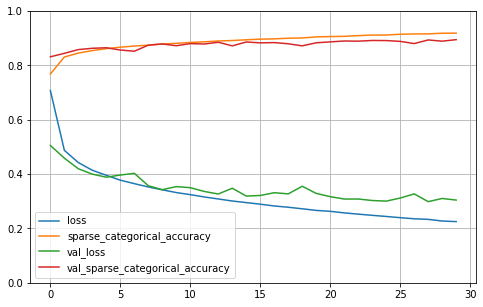

In [76]:
# If you create a Pandas DataFrame using this dictionary and call its plot()
# method, you get the learning curves shown:

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### model evaluation

In [77]:
model.evaluate(x=X_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 84.5652 - sparse_categorical_accuracy: 0.8184


[84.56522369384766, 0.8184000253677368]

**Remember to resist the temptation to
tweak the hyperparameters on the test set, or else your estimate of the generalization
error will be too optimistic.**

### Making predictions with the model:


In [82]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
# to predict classes directly based on max probability:
y_pred = np.argmax(model.predict(x=X_new), axis=-1)
y_pred, np.array(class_names)[y_pred]

(array([9, 2, 1]), array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11'))